## 데이터로드

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotting 환경 설정
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [43]:
# 데이터를 구분하는 문자를 지정하는 옵션
# 제목만 전처리한 항목
vod = pd.read_csv('vod_prepro_series_nm.csv')
con = pd.read_csv('con_prepro_series_nm.csv', encoding='cp949')

In [44]:
vod

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,Category,rename,vod_id
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230812163507,TV프로그램,그것이알고싶다,297
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230816205227,TV프로그램,그것이알고싶다,297
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230829194727,TV프로그램,그것이알고싶다,297
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230813130609,TV프로그램,그것이알고싶다,297
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,20230804092737,TV프로그램,꼬리에꼬리를무는그날이야기,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10156,60169000,간질간질,키즈,학습,6.0,인기작가 서현의 그림책! 온몸으로 읽는 그림책 간질간질. 글자가 형태로 보이지 않고...,-,6,20230914211110,키즈,간질간질,3674
10157,66317000,알사탕,키즈,학습,8.0,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,8,20230903223544,키즈,알사탕,3671
10158,66317000,알사탕,키즈,학습,3.3,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,8,20230903223210,키즈,알사탕,3671
10159,66900000,월간 아기상어,키즈,학습,0.8,8-Bit Baby Shark. 오락실에 아기 상어가 나타났다?! 추억의 8비트 버...,아기상어,1,20230904120057,키즈,월간아기상어,406


In [45]:
con

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id
0,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,20230813071155,키즈,핑크퐁동물동요,882
1,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,20230813071215,키즈,핑크퐁동물동요,882
2,63086000,지니강이 플러스 시즌7,지니강이 플러스 시즌7,키즈,기타,로봇 세상에서 킥보드를 타요. 로보카 폴리 브룸스 타운에서 킥보드를 타요~ / 새로...,"헤이지니,럭키강이",11,20230827145542,키즈,지니강이플러스시즌7,1622
3,63086000,지니강이 플러스 시즌9,지니강이 플러스 시즌9,키즈,기타,지니가 화장품으로 슬라임을 만들어요. / 슈퍼히어로 강이! 문을 열면 춤을 춰요.,"헤이지니,럭키강이",11,20230827152417,키즈,지니강이플러스시즌9,2043
4,62733000,엘리가간다 시즌12,엘리가간다 시즌12,키즈,기타,미니 시리얼 팬케이크 만들기.,-,13,20230816112816,키즈,엘리가간다시즌12,1958
...,...,...,...,...,...,...,...,...,...,...,...,...
21124,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121656,키즈,슈퍼토끼,544
21125,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121646,키즈,슈퍼토끼,544
21126,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121655,키즈,슈퍼토끼,544
21127,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121655,키즈,슈퍼토끼,544


In [46]:
# 순서 및 컬럼명 변경
# 10657
vod = vod[['subsr', 'asset_nm', 'ct_cl', 'genre_of_ct_cl', 'use_tms', 'disp_rtm', 'SMRY', 'strt_dt', 'Category', 'rename', 'vod_id']]
vod = vod.rename(columns = {'asset_nm' : 'series_nm', 'strt_dt' : 'log_dt'})
vod['type'] = 'watched'
vod.tail(3)

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,Category,rename,vod_id,type
10158,66317000,알사탕,키즈,학습,3.3,8,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",20230903223210,키즈,알사탕,3671,watched
10159,66900000,월간 아기상어,키즈,학습,0.8,1,8-Bit Baby Shark. 오락실에 아기 상어가 나타났다?! 추억의 8비트 버...,20230904120057,키즈,월간아기상어,406,watched
10160,60169000,놀자!,키즈,학습,6.8,7,[인기작가 박정섭의 그림책] 놀고 싶은 어린이들 모두 모두 모여라! 온몸으로 뛰어놀...,20230914210135,키즈,놀자!,589,watched


In [47]:
# 21105
con['type'] = 'click'
con.tail(3)

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,type
21126,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121655,키즈,슈퍼토끼,544,click
21127,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121655,키즈,슈퍼토끼,544,click
21128,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121654,키즈,슈퍼토끼,544,click


In [50]:
ccon = con.copy()
vvod = vod.copy()

### score 생성

In [51]:
# 정렬
all = pd.concat([vvod, ccon], ignore_index = True).sort_values('log_dt')
all

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,Category,rename,vod_id,type,super_asset_nm,ACTR_DISP
16631,60224000,아씨두리안,TV드라마,기타,NaN,65,클럽에서 만난 도이와 주남은 다시 만나기로 약속한다. 과거 김 씨 부인은 리안에게 ...,20230801000038,TV프로그램,아씨두리안,780,click,아씨두리안,"박주미,최명길,김민준,한다감,전노민,윤해영,지영산,유정후,이다연,김채은,황미나"
11500,65265000,러브 포 세일,영화,드라마,NaN,89,"내 이름은 스즈키 료코, 29세. AV 배우였다가 신문 기자를 거쳐, 지금은 도쿄대...",20230801000444,영화,러브포세일,1267,click,러브 포 세일,"시바타 치히로,코니시 키스,우치다 치카 ,토미테 아미"
13592,64399000,악마들,영화,액션/어드벤쳐,NaN,106,"서비스 해지 시까지 시청 가능. 아무런 동기도, 흔적도 없이 이어지는 연쇄살인. 살...",20230801000701,영화,악마들,2603,click,악마들,"장동윤,오대환,최귀화,장재호,손종학,신승환,윤병희"
18029,60067000,학려화정,TV드라마,외화 시리즈,NaN,40,황제는 태자비를 죽인 게 조 귀비인 걸 알지만 태자를 견제하기 위해 육문석에게 누명...,20230801002922,TV프로그램,학려화정,954,click,학려화정,"라진,이일동"
3580,60067000,학려화정,TV드라마,외화 시리즈,32.7,40,황제가 태자비 시해 사건을 그냥 무마하려 하자 소정권은 삼사를 움직여 황제를 압박한...,20230801002938,TV프로그램,학려화정,954,watched,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,64130000,효심이네 각자도생,TV드라마,기타,0.0,64,"효도가 명희를 의천 빌라에 데려다 놓는다. 태민은 태호에게 프로젝트를 맡기고, 진범...",20230930234119,TV프로그램,효심이네각자도생,1885,watched,NaN,NaN
7491,64154000,최강 배달꾼,TV드라마,기타,0.0,56,강수는 배달전문 회사 최강배달꾼의 가맹점을 늘리기 위해 배달부들과 함께 먹자골목을 ...,20230930235126,TV프로그램,최강배달꾼,754,watched,NaN,NaN
23690,64984000,각시탈,TV드라마,기타,NaN,63,콘노국장의 명령마저 무시한 채 담사리의 공개처형을 진행하는 기무라. 강토는 기무라가...,20230930235619,TV프로그램,각시탈,757,click,각시탈,"주원,진세연,박기웅,한채아"
7166,64984000,각시탈,TV드라마,기타,0.0,64,호텔에 있어야 할 목단이 사라진 걸 알게 된 슈운지는 금화정에서 홍주에 의해 죽임을...,20230930235702,TV프로그램,각시탈,757,watched,NaN,NaN


In [53]:
all['log_dt'] = pd.to_datetime(all['log_dt'], format='%Y%m%d%H%M%S')

all

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,Category,rename,vod_id,type,super_asset_nm,ACTR_DISP
16631,60224000,아씨두리안,TV드라마,기타,NaN,65,클럽에서 만난 도이와 주남은 다시 만나기로 약속한다. 과거 김 씨 부인은 리안에게 ...,2023-08-01 00:00:38,TV프로그램,아씨두리안,780,click,아씨두리안,"박주미,최명길,김민준,한다감,전노민,윤해영,지영산,유정후,이다연,김채은,황미나"
11500,65265000,러브 포 세일,영화,드라마,NaN,89,"내 이름은 스즈키 료코, 29세. AV 배우였다가 신문 기자를 거쳐, 지금은 도쿄대...",2023-08-01 00:04:44,영화,러브포세일,1267,click,러브 포 세일,"시바타 치히로,코니시 키스,우치다 치카 ,토미테 아미"
13592,64399000,악마들,영화,액션/어드벤쳐,NaN,106,"서비스 해지 시까지 시청 가능. 아무런 동기도, 흔적도 없이 이어지는 연쇄살인. 살...",2023-08-01 00:07:01,영화,악마들,2603,click,악마들,"장동윤,오대환,최귀화,장재호,손종학,신승환,윤병희"
18029,60067000,학려화정,TV드라마,외화 시리즈,NaN,40,황제는 태자비를 죽인 게 조 귀비인 걸 알지만 태자를 견제하기 위해 육문석에게 누명...,2023-08-01 00:29:22,TV프로그램,학려화정,954,click,학려화정,"라진,이일동"
3580,60067000,학려화정,TV드라마,외화 시리즈,32.7,40,황제가 태자비 시해 사건을 그냥 무마하려 하자 소정권은 삼사를 움직여 황제를 압박한...,2023-08-01 00:29:38,TV프로그램,학려화정,954,watched,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,64130000,효심이네 각자도생,TV드라마,기타,0.0,64,"효도가 명희를 의천 빌라에 데려다 놓는다. 태민은 태호에게 프로젝트를 맡기고, 진범...",2023-09-30 23:41:19,TV프로그램,효심이네각자도생,1885,watched,NaN,NaN
7491,64154000,최강 배달꾼,TV드라마,기타,0.0,56,강수는 배달전문 회사 최강배달꾼의 가맹점을 늘리기 위해 배달부들과 함께 먹자골목을 ...,2023-09-30 23:51:26,TV프로그램,최강배달꾼,754,watched,NaN,NaN
23690,64984000,각시탈,TV드라마,기타,NaN,63,콘노국장의 명령마저 무시한 채 담사리의 공개처형을 진행하는 기무라. 강토는 기무라가...,2023-09-30 23:56:19,TV프로그램,각시탈,757,click,각시탈,"주원,진세연,박기웅,한채아"
7166,64984000,각시탈,TV드라마,기타,0.0,64,호텔에 있어야 할 목단이 사라진 걸 알게 된 슈운지는 금화정에서 홍주에 의해 죽임을...,2023-09-30 23:57:02,TV프로그램,각시탈,757,watched,NaN,NaN


In [58]:
data1 = all[['subsr', 'series_nm', 'vod_id', 'log_dt']]
data1 = data1.drop_duplicates()
data1

,subsr,series_nm,vod_id,log_dt
16631,60224000,아씨두리안,780,2023-08-01 00:00:38
11500,65265000,러브 포 세일,1267,2023-08-01 00:04:44
13592,64399000,악마들,2603,2023-08-01 00:07:01
18029,60067000,학려화정,954,2023-08-01 00:29:22
3580,60067000,학려화정,954,2023-08-01 00:29:38
...,...,...,...,...
7618,64130000,효심이네 각자도생,1885,2023-09-30 23:41:19
7491,64154000,최강 배달꾼,754,2023-09-30 23:51:26
23690,64984000,각시탈,757,2023-09-30 23:56:19
7166,64984000,각시탈,757,2023-09-30 23:57:02


In [59]:
data2 = all[['subsr', 'series_nm', 'vod_id', 'type', 'log_dt']]
data2

,subsr,series_nm,vod_id,type,log_dt
16631,60224000,아씨두리안,780,click,2023-08-01 00:00:38
11500,65265000,러브 포 세일,1267,click,2023-08-01 00:04:44
13592,64399000,악마들,2603,click,2023-08-01 00:07:01
18029,60067000,학려화정,954,click,2023-08-01 00:29:22
3580,60067000,학려화정,954,watched,2023-08-01 00:29:38
...,...,...,...,...,...
7618,64130000,효심이네 각자도생,1885,watched,2023-09-30 23:41:19
7491,64154000,최강 배달꾼,754,watched,2023-09-30 23:51:26
23690,64984000,각시탈,757,click,2023-09-30 23:56:19
7166,64984000,각시탈,757,watched,2023-09-30 23:57:02


In [62]:
data2_count = data2.groupby(['subsr', 'series_nm', 'vod_id']).agg({'log_dt': 'count'}).reset_index()
data2_count.columns = ['subsr', 'series_nm', 'vod_id', 'Affinity']
data2_count

,subsr,series_nm,vod_id,Affinity
0,59879000,나쁜엄마,3403,1
1,59879000,나의 해방일지,1859,1
2,59879000,낭만닥터 김사부2,1168,1
3,59879000,소방서 옆 경찰서,2092,5
4,59879000,슬기로운 의사생활 시즌2,2891,1
...,...,...,...,...
7708,67160000,심야괴담회,143,1
7709,67160000,콘크리트 유토피아,2630,1
7710,67161000,스파이 코드명 포춘,3824,4
7711,67164000,미션 임파서블: 데드 레코닝 PART ONE,2867,2


In [63]:
data2_w = data2.copy()

conditions = [
    data2_w['type'] == 'click',
    data2_w['type'] == 'watched'
]

choices = [1, 2]

data2_w['Weight'] = np.select(conditions, choices, default='0')

# type 변환 
data2_w['Weight'] = pd.to_numeric(data2_w['Weight'])
data2_w

,subsr,series_nm,vod_id,type,log_dt,Weight
16631,60224000,아씨두리안,780,click,2023-08-01 00:00:38,1
11500,65265000,러브 포 세일,1267,click,2023-08-01 00:04:44,1
13592,64399000,악마들,2603,click,2023-08-01 00:07:01,1
18029,60067000,학려화정,954,click,2023-08-01 00:29:22,1
3580,60067000,학려화정,954,watched,2023-08-01 00:29:38,2
...,...,...,...,...,...,...
7618,64130000,효심이네 각자도생,1885,watched,2023-09-30 23:41:19,2
7491,64154000,최강 배달꾼,754,watched,2023-09-30 23:51:26,2
23690,64984000,각시탈,757,click,2023-09-30 23:56:19,1
7166,64984000,각시탈,757,watched,2023-09-30 23:57:02,2


In [65]:
# 동일 프로그램명 X
data2_wcount = data2_w.groupby(['subsr', 'series_nm','vod_id'])['Weight'].sum().reset_index()
data2_wcount.columns = ['subsr', 'series_nm','vod_id', 'Affinity']
data2_wcount

,subsr,series_nm,vod_id,Affinity
0,59879000,나쁜엄마,3403,1
1,59879000,나의 해방일지,1859,1
2,59879000,낭만닥터 김사부2,1168,1
3,59879000,소방서 옆 경찰서,2092,7
4,59879000,슬기로운 의사생활 시즌2,2891,1
...,...,...,...,...
7708,67160000,심야괴담회,143,1
7709,67160000,콘크리트 유토피아,2630,1
7710,67161000,스파이 코드명 포춘,3824,5
7711,67164000,미션 임파서블: 데드 레코닝 PART ONE,2867,2


In [66]:
T = 30

t_ref = pd.to_datetime(data2_w['log_dt'], "").max()

In [67]:
t_ref

Timestamp('2023-09-30 23:57:36')

In [68]:
# Timedecay 생성 

data2_w['Timedecay'] = data2_w.apply(
    lambda x: x['Weight'] * np.power(0.5, (t_ref - pd.to_datetime(x['log_dt'])).days / T),
    axis=1
)
data2_w

,subsr,series_nm,vod_id,type,log_dt,Weight,Timedecay
16631,60224000,아씨두리안,780,click,2023-08-01 00:00:38,1,0.25
11500,65265000,러브 포 세일,1267,click,2023-08-01 00:04:44,1,0.25
13592,64399000,악마들,2603,click,2023-08-01 00:07:01,1,0.25
18029,60067000,학려화정,954,click,2023-08-01 00:29:22,1,0.25
3580,60067000,학려화정,954,watched,2023-08-01 00:29:38,2,0.50
...,...,...,...,...,...,...,...
7618,64130000,효심이네 각자도생,1885,watched,2023-09-30 23:41:19,2,2.00
7491,64154000,최강 배달꾼,754,watched,2023-09-30 23:51:26,2,2.00
23690,64984000,각시탈,757,click,2023-09-30 23:56:19,1,1.00
7166,64984000,각시탈,757,watched,2023-09-30 23:57:02,2,2.00


In [71]:
data2_wt = data2_w.groupby(['subsr', 'series_nm', 'vod_id'])['Timedecay'].sum().reset_index()
data2_wt.columns = ['subsr', 'series_nm','vod_id', 'Affinity']
ACscore_data = data2_wt

ACscore_data

,subsr,series_nm,vod_id,Affinity
0,59879000,나쁜엄마,3403,0.250000
1,59879000,나의 해방일지,1859,0.250000
2,59879000,낭만닥터 김사부2,1168,0.250000
3,59879000,소방서 옆 경찰서,2092,1.750000
4,59879000,슬기로운 의사생활 시즌2,2891,0.250000
...,...,...,...,...
7708,67160000,심야괴담회,143,0.793701
7709,67160000,콘크리트 유토피아,2630,0.870551
7710,67161000,스파이 코드명 포춘,3824,4.061262
7711,67164000,미션 임파서블: 데드 레코닝 PART ONE,2867,1.909683


In [72]:
ACscore_data['Affinity'].sort_values()

0         0.250000
3662      0.250000
1838      0.250000
5104      0.250000
3599      0.250000
           ...    
455     167.593732
554     169.230899
4422    176.767434
6896    223.540192
3596    393.486230
Name: Affinity, Length: 7713, dtype: float64

In [73]:
ACscore_data[(ACscore_data["series_nm"] == "밀수") & (ACscore_data['subsr'] == 67164000)]

,subsr,series_nm,vod_id,Affinity
7712,67164000,밀수,2865,9.615371


In [74]:
a = all.drop_duplicates(subset = ['subsr', 'series_nm'])
a.head(1)

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,Category,rename,vod_id,type,super_asset_nm,ACTR_DISP
16631,60224000,아씨두리안,TV드라마,기타,NaN,65,클럽에서 만난 도이와 주남은 다시 만나기로 약속한다. 과거 김 씨 부인은 리안에게 ...,2023-08-01 00:00:38,TV프로그램,아씨두리안,780,click,아씨두리안,"박주미,최명길,김민준,한다감,전노민,윤해영,지영산,유정후,이다연,김채은,황미나"


In [75]:
a[(a["series_nm"] == "밀수") & (a['subsr'] == 67164000)]

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,Category,rename,vod_id,type,super_asset_nm,ACTR_DISP
30701,67164000,밀수,영화,액션/어드벤쳐,NaN,0,평화롭던 바닷가 마을 군천에 화학 공장이 들어서면서 하루아침에 일자리를 잃은 해녀들...,2023-09-28 17:29:01,영화,밀수,2865,click,밀수,"김혜수,염정아,조인성,박정민,김종수,고민시"


In [77]:
score = ACscore_data.merge(a, on = ['subsr', 'series_nm','vod_id'], how = 'left')
c_score = score[['subsr', 'series_nm','vod_id', 'Affinity', 'ct_cl', 'genre_of_ct_cl']]
c_score

,subsr,series_nm,vod_id,Affinity,ct_cl,genre_of_ct_cl
0,59879000,나쁜엄마,3403,0.250000,TV드라마,기타
1,59879000,나의 해방일지,1859,0.250000,TV드라마,기타
2,59879000,낭만닥터 김사부2,1168,0.250000,TV드라마,기타
3,59879000,소방서 옆 경찰서,2092,1.750000,TV드라마,기타
4,59879000,슬기로운 의사생활 시즌2,2891,0.250000,TV드라마,기타
...,...,...,...,...,...,...
7708,67160000,심야괴담회,143,0.793701,TV 연예/오락,기타
7709,67160000,콘크리트 유토피아,2630,0.870551,영화,드라마
7710,67161000,스파이 코드명 포춘,3824,4.061262,영화,액션/어드벤쳐
7711,67164000,미션 임파서블: 데드 레코닝 PART ONE,2867,1.909683,영화,액션/어드벤쳐


In [78]:
c_score[(c_score["series_nm"] == "밀수") & (c_score['subsr'] == 67164000)]

,subsr,series_nm,vod_id,Affinity,ct_cl,genre_of_ct_cl
7712,67164000,밀수,2865,9.615371,영화,액션/어드벤쳐


In [81]:
from sklearn.preprocessing import MinMaxScaler
# 로그 변환 적용
c_score['Affinity'] = np.log1p(c_score['Affinity'])
# Min-Max 스케일링 적용
scaler = MinMaxScaler(feature_range=(1, 5))
c_score['Affinity'] = scaler.fit_transform(c_score[['Affinity']])
# 스케일링된 값 정수로 변환
c_score['Affinity'] = c_score['Affinity'].round().astype(int)
# 결과 확인
all = c_score.copy()
all.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7464\4157021636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_score['Affinity'] = np.log1p(c_score['Affinity'])
C:\Users\USER\AppData\Local\Temp\ipykernel_7464\4157021636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_score['Affinity'] = scaler.fit_transform(c_score[['Affinity']])
C:\Users\USER\AppData\Local\Temp\ipykernel_7464\4157021636.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,subsr,series_nm,vod_id,Affinity,ct_cl,genre_of_ct_cl
0,59879000,나쁜엄마,3403,1,TV드라마,기타
1,59879000,나의 해방일지,1859,1,TV드라마,기타
2,59879000,낭만닥터 김사부2,1168,1,TV드라마,기타
3,59879000,소방서 옆 경찰서,2092,2,TV드라마,기타
4,59879000,슬기로운 의사생활 시즌2,2891,1,TV드라마,기타


In [87]:
all.to_csv('c_score.csv', index=False, encoding='cp949')

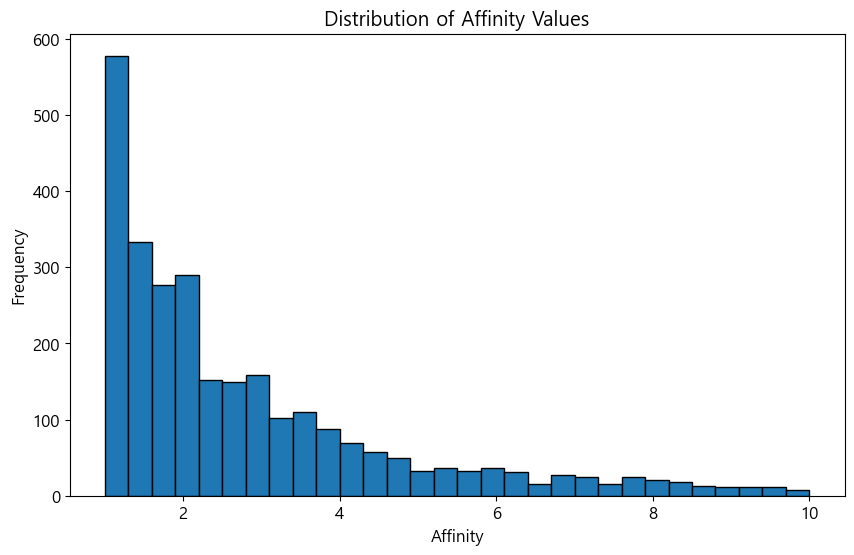

In [90]:
# 30 range
plt.figure(figsize=(10, 6))
plt.hist(ACscore_data['Affinity'], bins=30, range=(1, 10), edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.show()